In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#libraries for webscraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re

In [ ]:
records_list = []
page_num=input("Enter number of pages : ")
for i in range(1,int(page_num)+1):
    url="https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page="+str(i)
    page = requests.get(url)
    content = page.content 
    soup = BeautifulSoup(content,'html.parser')
    item = content[i]
    def extract_phone_model_info(item):
    # Extracting the model of the phone from the 1st card
        model = item.find('div',{'class':"_4rR01T"}).text
    # Extracting Stars from 1st card
        star = item.find('div',{'class':"_3LWZlK"}).text
    # Extracting Number of Ratings from 1st card
        num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
    # Extracting Number of Reviews from 1st card
        reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
    # Extracting RAM from the 1st card
        ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
    # Extracting Storage/ROM from 1st card
        storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
    # Extracting whether there is an option of expanding the storage or not
        expandable = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:]
    # Extracting the display option from the 1st card
        display = item.find_all('li')[1].text.strip()
    # Extracting camera options from the 1st card
        camera = item.find_all('li')[2].text.strip()
    # Extracting the battery option from the 1st card
        battery = item.find_all('li')[3].text
    # Extracting the processir option from the 1st card
        processor = item.find_all('li')[-2].text.strip()
    # Extracting Warranty from the 1st card
        warranty = item.find_all('li')[-1].text.strip()
    # Extracting price of the model from the 1st card
        price = item.find('div',{'class':'_30jeq3 _1_WHN1'}).text
        result = (model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price)
        return result
    # Now putting all the information from all the cards/phone models and putting them into a list
    
    results = soup.find_all('a',{'class':"_1fQZEK"})
    for item in results:
        records_list.append(extract_phone_model_info(item))    
df=pd.DataFrame(records_list,columns=['model',"star","num_ratings","reviews",'ram',"storage","expandable","display","camera","battery","processor","warranty","price"])
#df.info()
#df

# Importing the CSV file 

In [2]:
df1=pd.read_csv("flipkart_mobiles.csv")
df1

,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹9,499"
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹9,499"
2,"POCO C31 (Shadow Gray, 32 GB)",4.3,"11,043 Ratings",633 Reviews,3 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek Helio G35 Processor,"1 Year Warranty for Handset, 6 Months for Acce...","₹7,999"
3,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,128 GB RO,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹10,499"
4,"REDMI 9i Sport (Carbon Black, 64 GB)",4.4,"29,829 Ratings","1,537 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹8,499"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"REDMI Note 10S (Cosmic Purple, 128 GB)",4.1,85 Ratings,6 Reviews,8 GB RAM,128 GB RO,NaN,16.26 cm (6.4 inch) Display,64MP Rear Camera,5000 mAh Battery,5000 mAh Battery,1 Year Warranty,"₹19,275"
356,"Itel Magic2 4G (WiFi, Hotspot Tethering)",4.0,"8,847 Ratings","1,456 Reviews",64 MB RAM,128 MB RO,Expandable Upto 64 GB,6.1 cm (2.4 inch) QVGA Display,1.3MP Rear Camera,1900 mAh Lithium ion Battery,Unisoc T117 Processor,"1 Year Warranty, 100 Days Replacement within 1...","₹2,378"
357,"REDMI Note 10T 5G (Graphite Black, 64 GB)",4.2,914 Ratings,65 Reviews,4 GB RAM,64 GB ROM,NaN,16.51 cm (6.5 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Battery,MediaTek Dimensity 700 Processor,1 Year Manufacturer Warranty for Device and 6 ...,"₹15,085"
358,"MOTOROLA Edge 20 (Frosted Onyx, 128 GB)",4.1,"3,813 Ratings",639 Reviews,8 GB RAM,128 GB RO,NaN,17.02 cm (6.7 inch) Full HD+ Display,108MP + 8MP + 16MP | 32MP Front Camera,4000 mAh Battery,6.99mm Slim Design,1 Year on Handset and 6 Months on Accessories,"₹27,999"


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        360 non-null    object 
 1   star         360 non-null    float64
 2   num_ratings  360 non-null    object 
 3   reviews      360 non-null    object 
 4   ram          360 non-null    object 
 5   storage      360 non-null    object 
 6   expandable   256 non-null    object 
 7   display      360 non-null    object 
 8   camera       360 non-null    object 
 9   battery      360 non-null    object 
 10  processor    360 non-null    object 
 11  warranty     359 non-null    object 
 12  price        360 non-null    object 
dtypes: float64(1), object(12)
memory usage: 36.7+ KB


In [4]:
df2=df1
df2

,model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price
0,"SAMSUNG Galaxy F12 (Celestial Black, 64 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹9,499"
1,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹9,499"
2,"POCO C31 (Shadow Gray, 32 GB)",4.3,"11,043 Ratings",633 Reviews,3 GB RAM,32 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek Helio G35 Processor,"1 Year Warranty for Handset, 6 Months for Acce...","₹7,999"
3,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.2,"1,87,556 Ratings","14,956 Reviews",4 GB RAM,128 GB RO,Expandable Upto 512 GB,16.55 cm (6.515 inch) HD+ Display,48MP + 5MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Battery,Exynos 850 Processor,1 Year Warranty Provided by the Manufacturer f...,"₹10,499"
4,"REDMI 9i Sport (Carbon Black, 64 GB)",4.4,"29,829 Ratings","1,537 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP Rear Camera | 5MP Front Camera,5000 mAh Li-Polymer Battery,MediaTek Helio G25 Processor,Brand Warranty of 1 Year Available for Mobile ...,"₹8,499"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,"REDMI Note 10S (Cosmic Purple, 128 GB)",4.1,85 Ratings,6 Reviews,8 GB RAM,128 GB RO,NaN,16.26 cm (6.4 inch) Display,64MP Rear Camera,5000 mAh Battery,5000 mAh Battery,1 Year Warranty,"₹19,275"
356,"Itel Magic2 4G (WiFi, Hotspot Tethering)",4.0,"8,847 Ratings","1,456 Reviews",64 MB RAM,128 MB RO,Expandable Upto 64 GB,6.1 cm (2.4 inch) QVGA Display,1.3MP Rear Camera,1900 mAh Lithium ion Battery,Unisoc T117 Processor,"1 Year Warranty, 100 Days Replacement within 1...","₹2,378"
357,"REDMI Note 10T 5G (Graphite Black, 64 GB)",4.2,914 Ratings,65 Reviews,4 GB RAM,64 GB ROM,NaN,16.51 cm (6.5 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,5000 mAh Battery,MediaTek Dimensity 700 Processor,1 Year Manufacturer Warranty for Device and 6 ...,"₹15,085"
358,"MOTOROLA Edge 20 (Frosted Onyx, 128 GB)",4.1,"3,813 Ratings",639 Reviews,8 GB RAM,128 GB RO,NaN,17.02 cm (6.7 inch) Full HD+ Display,108MP + 8MP + 16MP | 32MP Front Camera,4000 mAh Battery,6.99mm Slim Design,1 Year on Handset and 6 Months on Accessories,"₹27,999"


# Brand

In [5]:
b1=[]
a=df2.model
for i in range(len(a)):
    b=''
    c=''
    b=a[i]
    c=b.split(' ')
    b1.append(c[0])
#b1

# Model

In [6]:
m1=[]
a=df2.model
for i in range(len(a)):
    b=''
    c=''
    b=a[i]
    c = ' '.join(b.split(' ')[1:])
    if '(' in c:
        m1.append(c.split('(')[0])
    else:
        m1.append(c)
#print(m1)

# Ratings

In [72]:
r1=[]
a=df2.num_ratings
a1=a.replace(',','',regex=True)
#a1
a2=a1.replace('Ratings','',regex=True)
#a2

for i in range(len(a2)):
    x=''
    x=float(a2[i])
    r1.append(x)
#r1

# reviews

In [8]:
r2=[]
a=df2.reviews
#a
a1=a.replace(',','',regex=True)
#a1
a2=a1.replace('Reviews','',regex=True)
a2
for i in range(len(a2)):
    x=''
    x=float(a2[i])
    r2.append(x)
#r2

# ram

In [9]:
r3=[]
#a
R3 = []
for i in range(len(df2.ram)):
    a1 = ''
    a1 = df2.ram[i]
    y = float(a1[0:2])
    if 'GB' in a1:
        r3.append(y)
    elif 'MB' in a1:
        r3.append(y/1000)
    elif '64' in a1:
        r3.append('3.0')
for i in range(len(r3)):
    x =''
    x = str(r3[i])
    if '64.0' in x:
        x1 = x.replace('64.0','0.064')
        R3.append(x1)
    else:
        R3.append(x)

# storage

In [10]:
s=[]
for i in range(len(df2.model)):
    a1 = '' 
    a1 = df2.model[i]
    if 'Hotspot Tetheri' in a1:
        s.append(0)
    elif ',' in a1:
        s.append(float(a1.split(',')[1][:len(a1.split(',')[1])-3]))
    else:
        s.append(0)
len(s)

360

# Expandable

In [11]:
e=[]
a=df2.expandable
#a
a1=a.replace('Expandable Upto ','',regex=True)
#a1
a2=a1.replace(' GB','',regex=True)
#a2
a3=a2.replace('xpandable Upto ','',regex=True)
a4=a3.replace(' MB','',regex=True)
a5=a4.fillna(0)
for i in range(len(a5)):
    b=''
    b=str(a5[i])
    if 'TB' in b:
        e.append(1000)
    else:
        e.append(float(b))
#e

# display

In [12]:
d=[]
a=df2.display
for i in range(len(a)):
    a1=''
    a1=float(a[i][0:4])
    d.append(a1)
len(d)

360

# battery

In [13]:
b=[]
a=df2.battery
a1=a.replace('12 M','3000',regex=True)
a2=a1.replace('A13 ','3000',regex=True)
a3=a2.replace('A14 ','3000',regex=True)
a4=a3.replace('1 Ye','3000',regex=True)
a5=a4.replace('Bran','3000',regex=True)
a6=a5.replace('SC65','3000',regex=True)
a7=a6.replace('Medi','3000',regex=True)
a8=a7.replace('6 Mo','3000',regex=True)
a9=a8.replace('2 Ye','3000',regex=True)
a10=a9.replace('A12 ','3000',regex=True)
for i in range(len(a10)):
    x=''
    x=float(a10[i][0:4])
    b.append(float(x))  
len(b)

360

# Price

In [14]:
p=[]
a=df2.price
#a
a1=a.replace('\₹','',regex=True)
#a1
a2=a1.replace('\,','',regex=True)
#a2
for i in range(len(a2)):
    a3=''
    a3=float(a2[i])
    p.append(a3)
#p

# Star

In [15]:
s1=[]
a=df2.star
#a
for i in range(len(a)):
    a1=''
    a1=a[i]
    s1.append(a1)
#s1

# color

In [16]:
c = []
a = df2.model
for i in range(len(a)):
    x = ''
    x = df2.model[i]
    if '(' in x:
        y = (x.split('(')[1]).split(',')[0]
        if 'WiFi' in y:
            c.append('none')
        else:
            c.append(y)
    else:
        c.append('none')
print(len(c))

360


In [17]:
print(len(b1))
print(len(m1))
print(len(r1))
print(len(r2))
print(len(R3))
print(len(s))
print(len(e))
print(len(d))
print(len(b))
print(len(p))
print(len(s1))
print(len(c))

360
360
360
360
360
360
360
360
360
360
360
360


In [18]:
data = {'Brand':b1,
        'Model':m1,
        'color':c,
        'StarRatings':s1,
        'Ratings':r1,
        'Reviews':r2,
        'RAM':R3,
        'Storage':s,
        'Expandable storage':e,
        'Display':d,
        'Battery':b,
        'Price':p}
Final = pd.DataFrame(data)
Final.to_csv("flipkart_mobiles_cleaned5_data.csv",index=False)
#Final

# Importing the csv file (cleaned data)

In [19]:
Final1=pd.read_csv("flipkart_mobiles_cleaned5_data.csv")
Final1

,Brand,Model,color,StarRatings,Ratings,Reviews,RAM,Storage,Expandable storage,Display,Battery,Price
0,SAMSUNG,Galaxy F12,Celestial Black,4.2,187556.0,14956.0,4.000,64.0,512.0,16.50,6000.0,9499.0
1,SAMSUNG,Galaxy F12,Sky Blue,4.2,187556.0,14956.0,4.000,64.0,512.0,16.50,6000.0,9499.0
2,POCO,C31,Shadow Gray,4.3,11043.0,633.0,3.000,32.0,512.0,16.50,5000.0,7999.0
3,SAMSUNG,Galaxy F12,Sky Blue,4.2,187556.0,14956.0,4.000,128.0,512.0,16.50,6000.0,10499.0
4,REDMI,9i Sport,Carbon Black,4.4,29829.0,1537.0,4.000,64.0,512.0,16.50,5000.0,8499.0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,REDMI,Note 10S,Cosmic Purple,4.1,85.0,6.0,8.000,128.0,0.0,16.20,5000.0,19275.0
356,Itel,Magic2 4G,none,4.0,8847.0,1456.0,0.064,0.0,64.0,6.10,1900.0,2378.0
357,REDMI,Note 10T 5G,Graphite Black,4.2,914.0,65.0,4.000,64.0,0.0,16.50,5000.0,15085.0
358,MOTOROLA,Edge 20,Frosted Onyx,4.1,3813.0,639.0,8.000,128.0,0.0,17.00,4000.0,27999.0


In [67]:
Final1.describe()

,StarRatings,Ratings,Reviews,RAM,Storage,Expandable storage,Display,Battery,Price
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,4.198889,39942.030556,2916.611111,3.347422,61.777778,228.400000,13.132833,4075.236111,10756.666667
std,0.232939,68641.219024,4709.107231,2.844255,57.957391,285.653424,5.212036,1668.905664,8968.300270
min,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,3.560000,800.000000,729.000000
25%,4.100000,1738.000000,143.000000,0.032000,0.000000,0.000000,6.100000,3000.000000,1674.000000
50%,4.300000,9780.500000,857.000000,4.000000,64.000000,256.000000,16.500000,5000.000000,9999.000000
75%,4.400000,54981.000000,3985.000000,4.000000,128.000000,256.000000,16.500000,5000.000000,15020.500000
max,4.800000,534655.000000,32559.000000,12.000000,256.000000,1000.000000,17.600000,7000.000000,43990.000000


In [20]:
Final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               360 non-null    object 
 1   Model               360 non-null    object 
 2   color               360 non-null    object 
 3   StarRatings         360 non-null    float64
 4   Ratings             360 non-null    float64
 5   Reviews             360 non-null    float64
 6   RAM                 360 non-null    float64
 7   Storage             360 non-null    float64
 8   Expandable storage  360 non-null    float64
 9   Display             360 non-null    float64
 10  Battery             360 non-null    float64
 11  Price               360 non-null    float64
dtypes: float64(9), object(3)
memory usage: 33.9+ KB


In [21]:
Final1['Brand'] = Final1.Brand.apply(lambda x:x.title())

In [22]:
Final1.groupby('Brand')['Display'].agg({'mean','max','min'}).max()

max     17.60000
min     16.50000
mean    17.16129
dtype: float64

In [23]:
Final1['Brand'].describe()

count        360
unique        26
top       Realme
freq          70
Name: Brand, dtype: object

In [24]:
Final1['StarRatings'].describe()

count    360.000000
mean       4.198889
std        0.232939
min        3.000000
25%        4.100000
50%        4.300000
75%        4.400000
max        4.800000
Name: StarRatings, dtype: float64

In [25]:
Final1['Ratings'].describe()

count       360.000000
mean      39942.030556
std       68641.219024
min           6.000000
25%        1738.000000
50%        9780.500000
75%       54981.000000
max      534655.000000
Name: Ratings, dtype: float64

In [26]:
Final1['Reviews'].describe()

count      360.000000
mean      2916.611111
std       4709.107231
min          0.000000
25%        143.000000
50%        857.000000
75%       3985.000000
max      32559.000000
Name: Reviews, dtype: float64

In [27]:
Final1['RAM'].describe()

count    360.000000
mean       3.347422
std        2.844255
min        0.000000
25%        0.032000
50%        4.000000
75%        4.000000
max       12.000000
Name: RAM, dtype: float64

In [28]:
Final1['Storage'].describe()

count    360.000000
mean      61.777778
std       57.957391
min        0.000000
25%        0.000000
50%       64.000000
75%      128.000000
max      256.000000
Name: Storage, dtype: float64

In [29]:
Final1['Expandable storage'].describe()

count     360.000000
mean      228.400000
std       285.653424
min         0.000000
25%         0.000000
50%       256.000000
75%       256.000000
max      1000.000000
Name: Expandable storage, dtype: float64

In [30]:
Final1['Display'].describe()

count    360.000000
mean      13.132833
std        5.212036
min        3.560000
25%        6.100000
50%       16.500000
75%       16.500000
max       17.600000
Name: Display, dtype: float64

In [31]:
Final1['Battery'].describe()

count     360.000000
mean     4075.236111
std      1668.905664
min       800.000000
25%      3000.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery, dtype: float64

In [32]:
Final1['Price'].describe()

count      360.000000
mean     10756.666667
std       8968.300270
min        729.000000
25%       1674.000000
50%       9999.000000
75%      15020.500000
max      43990.000000
Name: Price, dtype: float64

In [33]:
Final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               360 non-null    object 
 1   Model               360 non-null    object 
 2   color               360 non-null    object 
 3   StarRatings         360 non-null    float64
 4   Ratings             360 non-null    float64
 5   Reviews             360 non-null    float64
 6   RAM                 360 non-null    float64
 7   Storage             360 non-null    float64
 8   Expandable storage  360 non-null    float64
 9   Display             360 non-null    float64
 10  Battery             360 non-null    float64
 11  Price               360 non-null    float64
dtypes: float64(9), object(3)
memory usage: 33.9+ KB


# Data Visualisation

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
#sns.pairplot(data=Final1,hue='Ratings')
#plt.show()

# ___Univariate plots___

## 1 Countplot

   ### Count Brand Wise Phones

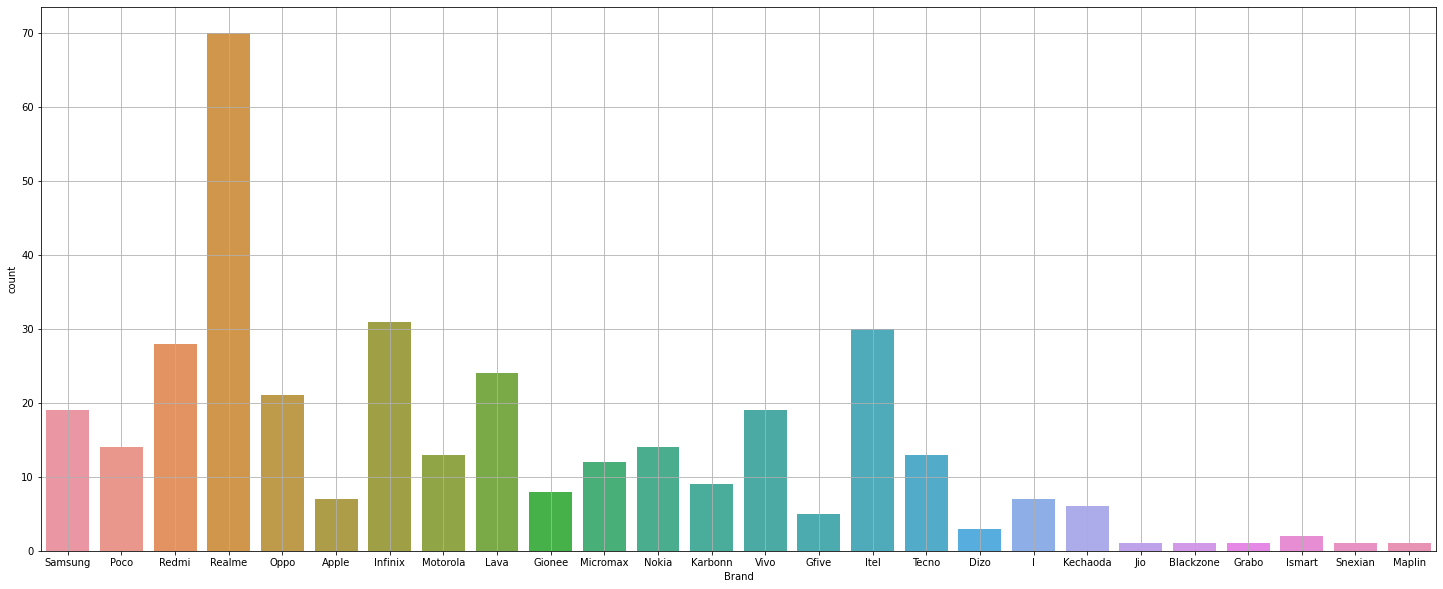

In [36]:
plt.figure(figsize=(25,10))
sns.countplot(x=Final1["Brand"])
plt.grid()
plt.show()

### __Categorization of Phones according to star ratings__

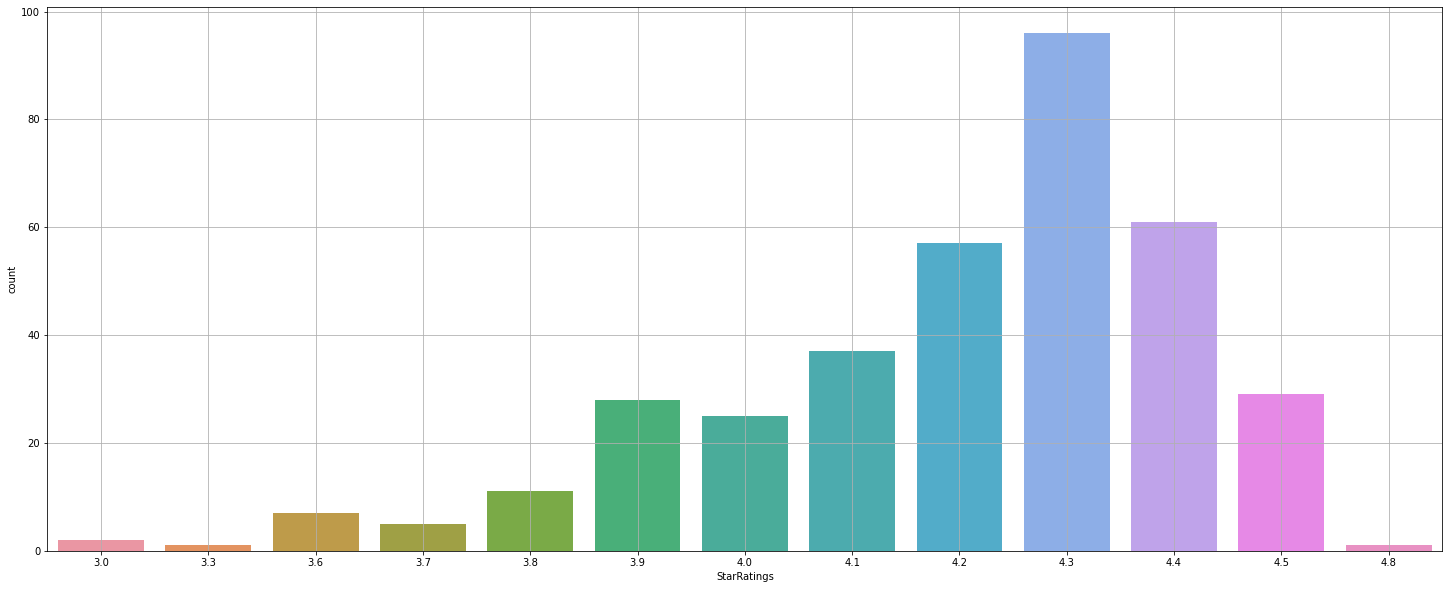

In [37]:
plt.figure(figsize=(25,10))
sns.countplot(x=Final1["StarRatings"])
plt.grid()
plt.show()

### No. of Smartphones that use different type of Ram

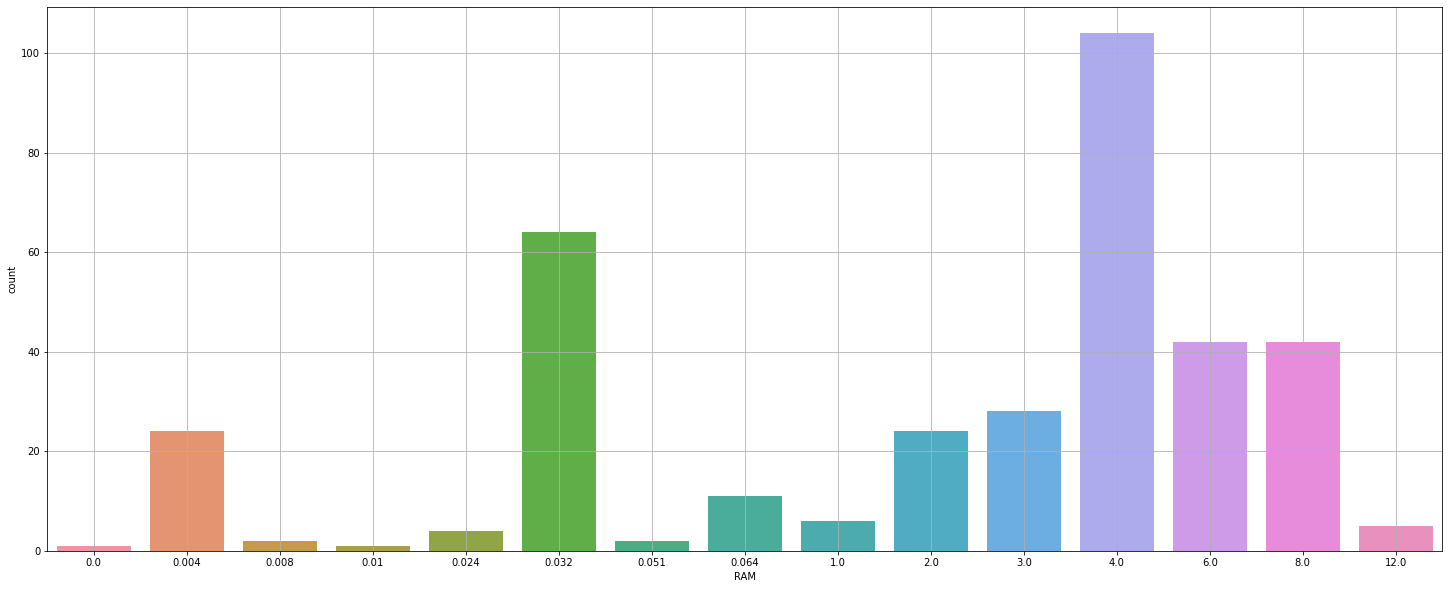

In [38]:
plt.figure(figsize=(25,10))
sns.countplot(x=Final1["RAM"])
plt.grid()
plt.show()

## 2 Pie plot

### __Percentage of phones that are available from each each brand__

In [39]:
y = Final1.Brand.apply(lambda x:x.title())
x = Final1.groupby('Brand')['Model'].count()

In [40]:
x = x.sort_values(ascending=False)

In [41]:
val = []
for i in range(len(x)):
    val.append(x[i])

In [42]:
val = val[:10]

In [66]:
label =list(x.index)[:10]
label

['Realme',
 'Infinix',
 'Itel',
 'Redmi',
 'Lava',
 'Oppo',
 'Samsung',
 'Vivo',
 'Nokia',
 'Poco']

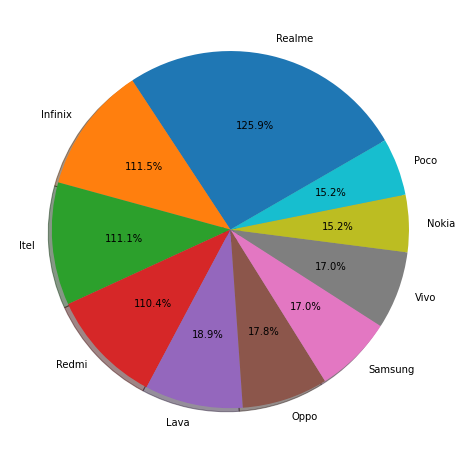

In [45]:
plt.figure(figsize=(8,9))
#    colors = ['#008000','#FFA500','#FF0000','#800000']
plt.pie(val,labels = label, startangle=30,autopct='1%.1f%%',shadow=True)
plt.show()

## 3 distplot
### __Phones with their price range__ 

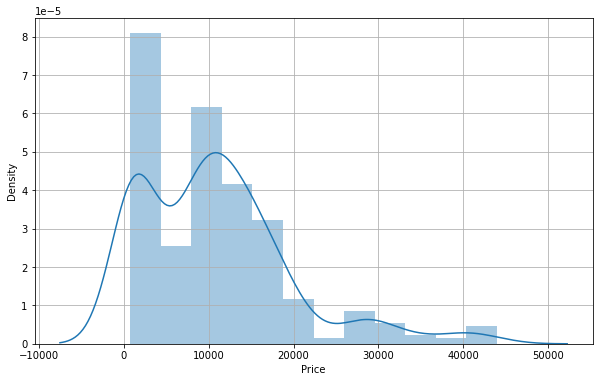

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(Final1["Price"])
plt.grid()
plt.show()

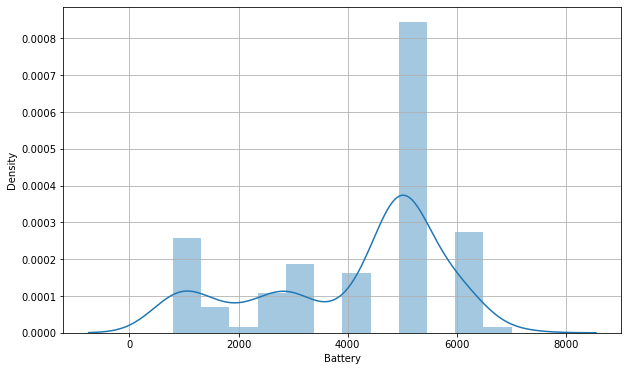

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(Final1["Battery"])
plt.grid()
plt.show()

## 4 histogram
### Kind of Screen mostly used in Phones

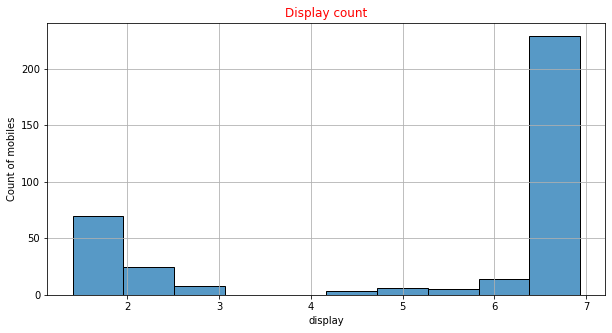

In [48]:
plt.figure(figsize=(10,5))
a=Final1["Display"]
sns.histplot(x=a*(0.394),edgecolor="k")
plt.title("Display count",color="r")
plt.xlabel("display")
plt.ylabel("Count of mobiles")
plt.grid()
plt.show()

### different types of storages used by all phones

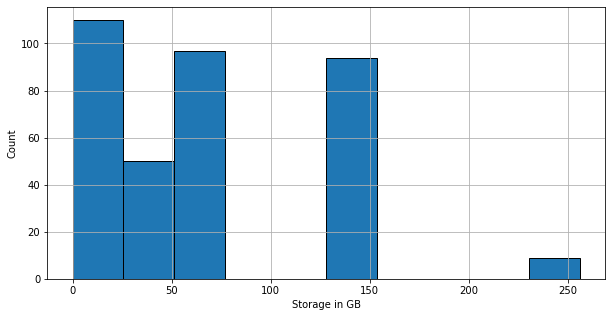

In [49]:
plt.figure(figsize=(10,5))
plt.hist(Final1["Storage"],edgecolor="k")
plt.grid()
plt.xlabel('Storage in GB')
plt.ylabel('Count')
plt.show()

## 4 Box Plot
### Smartphones which are costly

In [50]:
costly_mobiles=Final1[(Final1["Price"]>=25000)&(Final1["Price"]<=50000)]
#costly_mobiles

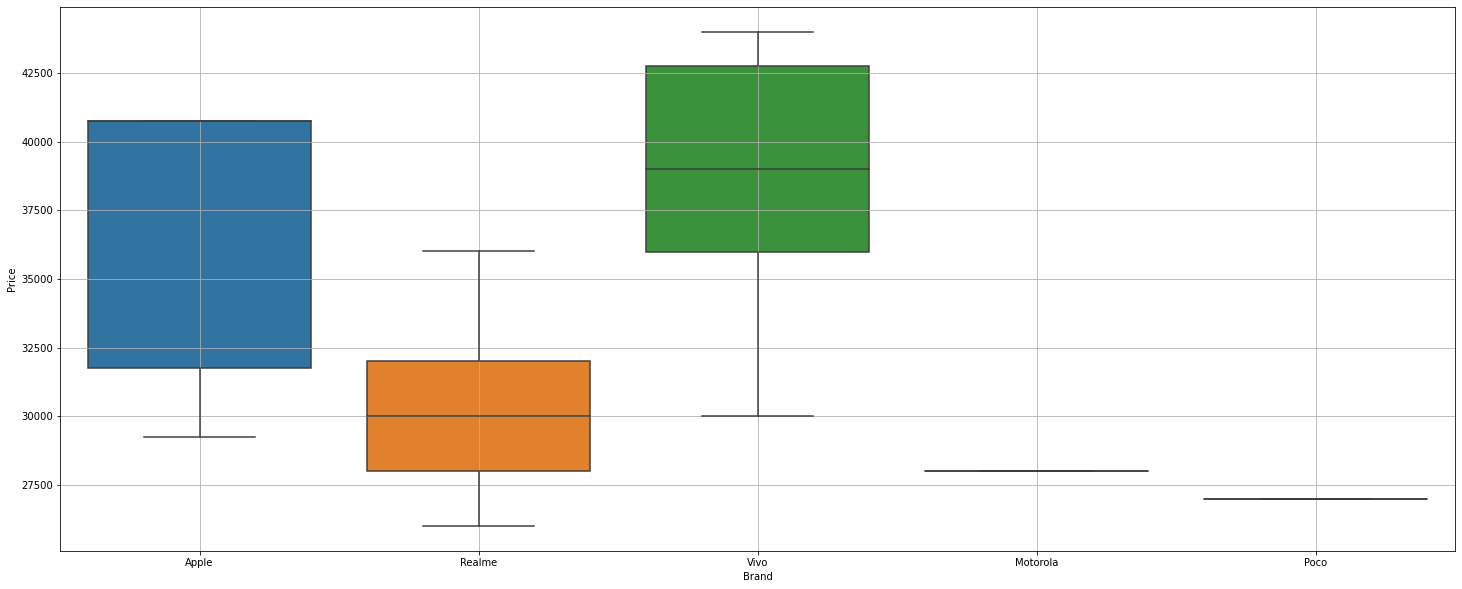

In [51]:
plt.figure(figsize=(25,10))
sns.boxplot(x=costly_mobiles["Brand"],y=costly_mobiles["Price"])
plt.grid()
plt.show()

# Bivariate plots

## 1 barplot

### Pricing average of each brand

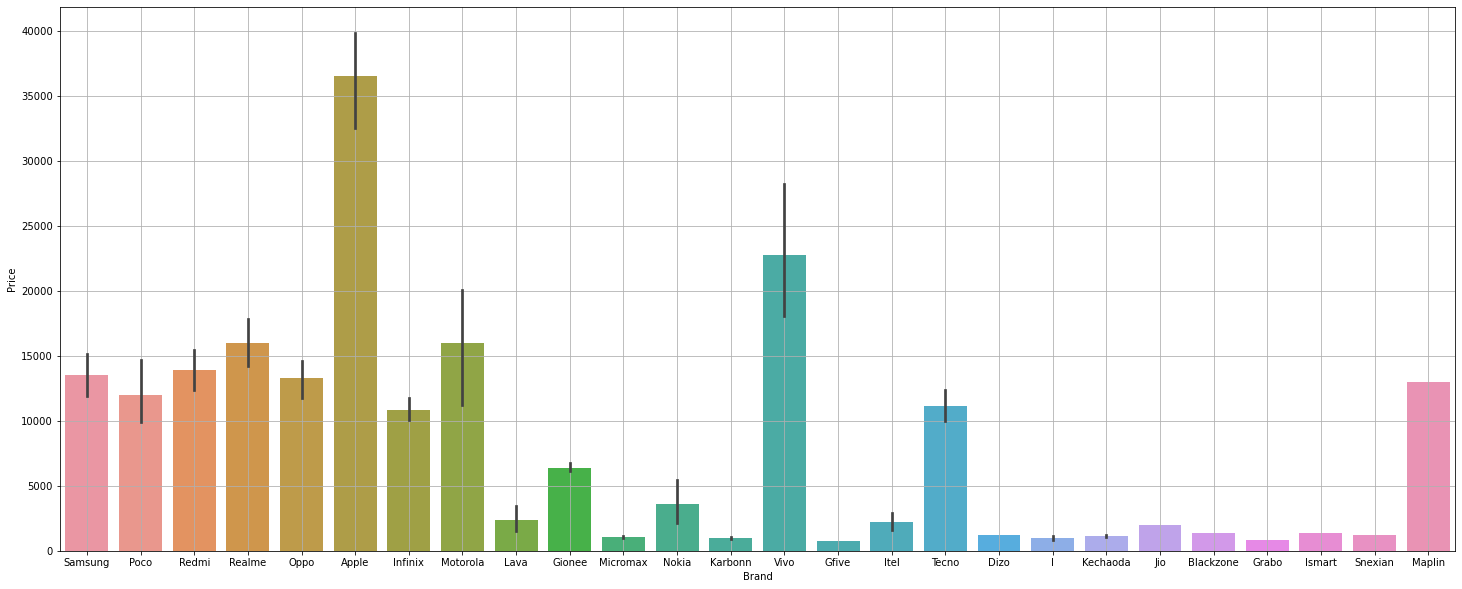

In [52]:
plt.figure(figsize=(25,10))
sns.barplot(x='Brand',y='Price',data=Final1)
plt.grid()
plt.show()

### Brands that achieved the number star ratings from (4 to 5).

In [53]:
ratings=Final1[(Final1["StarRatings"]>=4)&(Final1["StarRatings"]<=5.0)]
#ratings

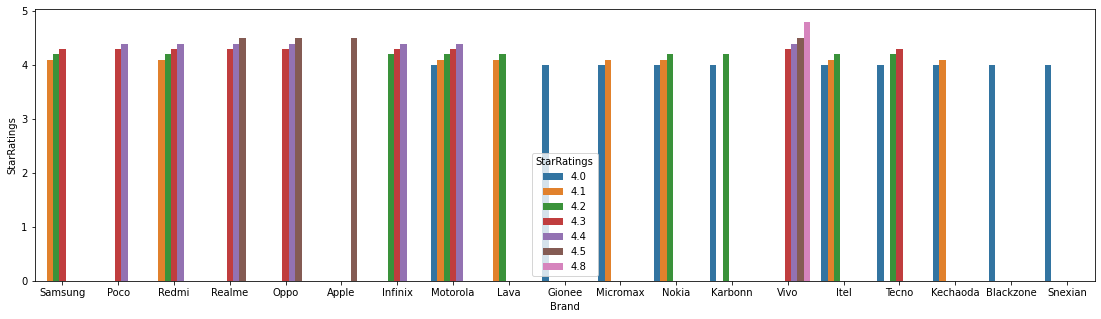

In [54]:
plt.figure(figsize=(19,5))
sns.barplot(x='Brand', y='StarRatings',hue='StarRatings',data=ratings)
plt.show()

## 2 scatter plot

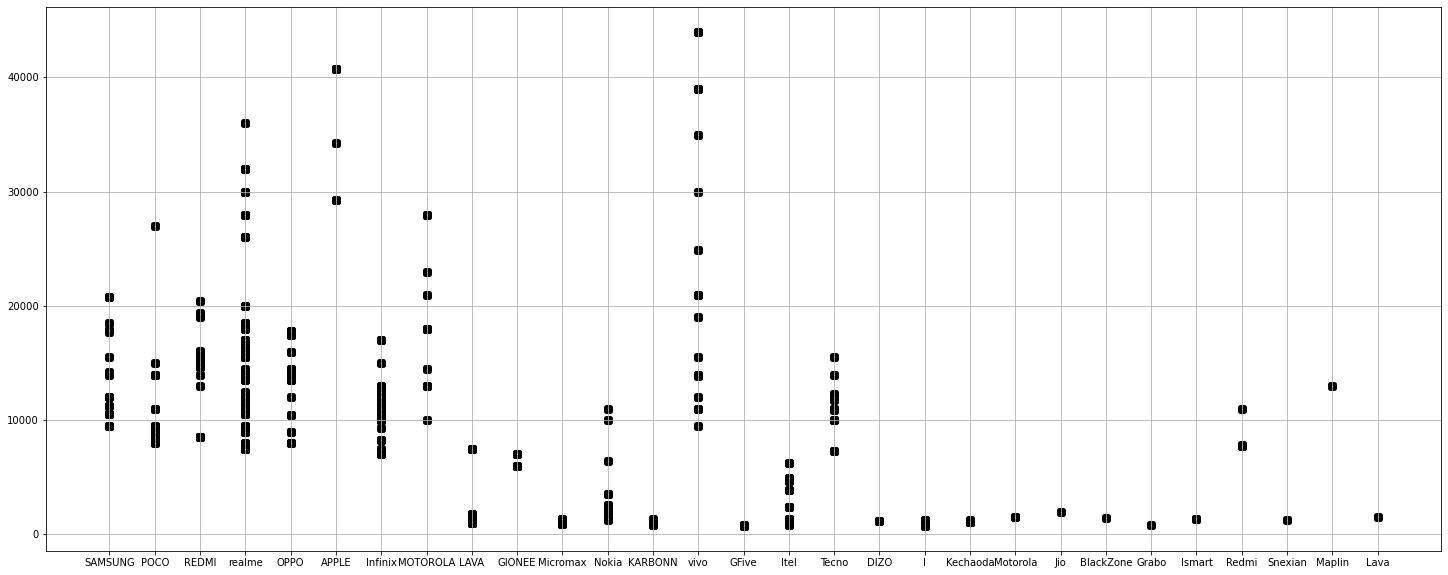

In [55]:
plt.figure(figsize=(25,10))
plt.scatter(b1,p, c='pink',linewidth=5,marker='s',edgecolor='black',s=10)
plt.grid()
plt.show()

## 3 boxplot

### batteries capacity and screen size of smartphones

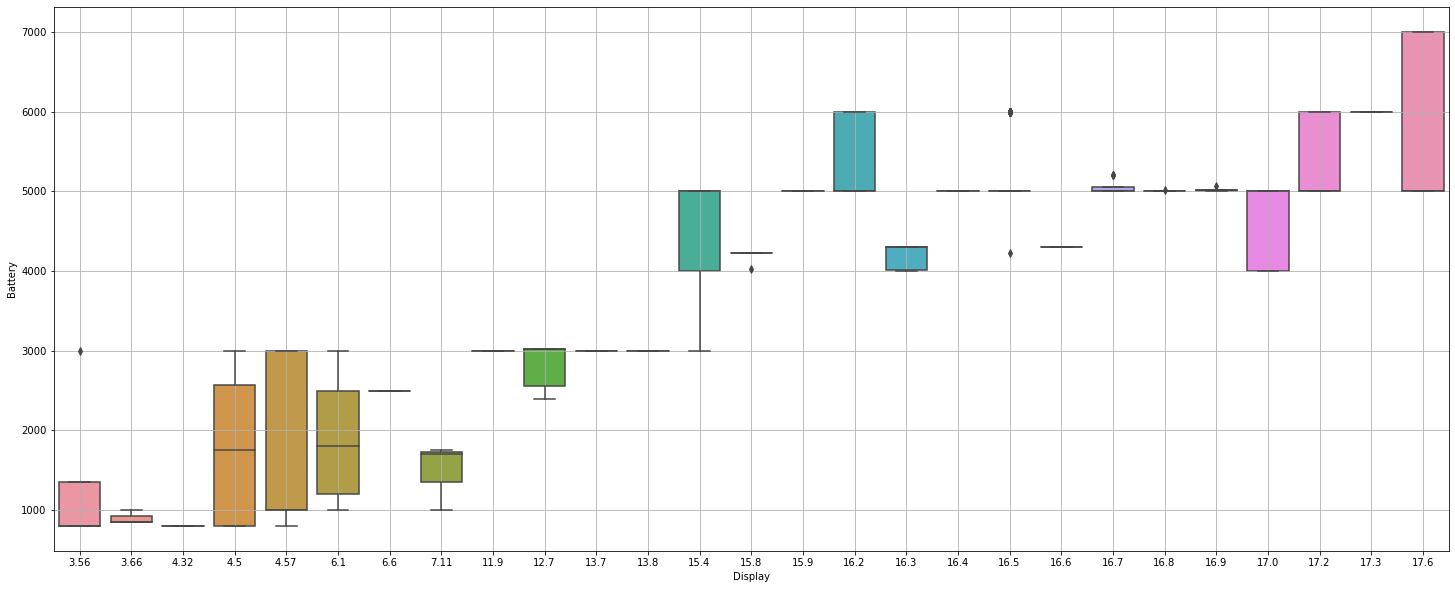

In [56]:
plt.figure(figsize=(25,10))
sns.boxplot(x=Final1["Display"],y=Final1["Battery"])
plt.grid()
plt.show()

## 4 line plot

### Smartphones in budget 

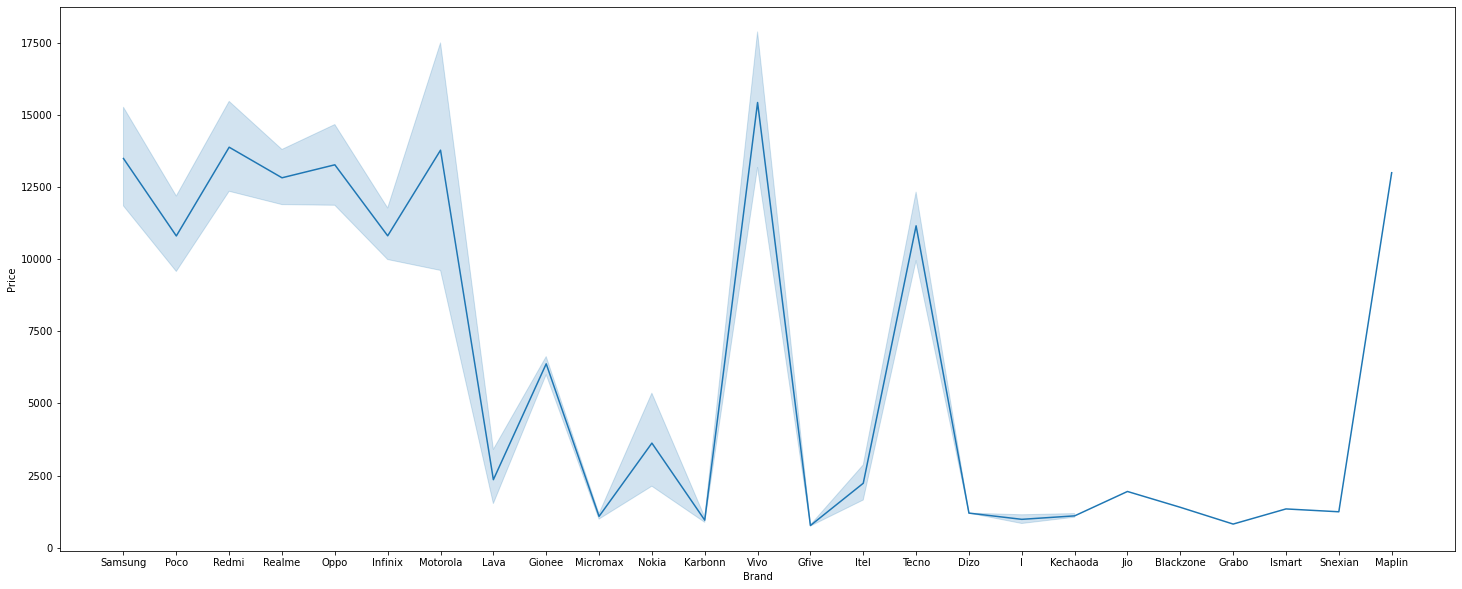

In [69]:
budget_price=Final1[(Final1["Price"]>=0)&(Final1["Price"]<=25000)]
#budget_price
plt.figure(figsize=(25,10))
sns.lineplot(x=budget_price["Brand"],y=budget_price["Price"])
plt.show()

In [70]:
budget_price


,Brand,Model,color,StarRatings,Ratings,Reviews,RAM,Storage,Expandable storage,Display,Battery,Price
0,Samsung,Galaxy F12,Celestial Black,4.2,187556.0,14956.0,4.000,64.0,512.0,16.50,6000.0,9499.0
1,Samsung,Galaxy F12,Sky Blue,4.2,187556.0,14956.0,4.000,64.0,512.0,16.50,6000.0,9499.0
2,Poco,C31,Shadow Gray,4.3,11043.0,633.0,3.000,32.0,512.0,16.50,5000.0,7999.0
3,Samsung,Galaxy F12,Sky Blue,4.2,187556.0,14956.0,4.000,128.0,512.0,16.50,6000.0,10499.0
4,Redmi,9i Sport,Carbon Black,4.4,29829.0,1537.0,4.000,64.0,512.0,16.50,5000.0,8499.0
...,...,...,...,...,...,...,...,...,...,...,...,...
354,Tecno,Spark go 2021,Maldives Blue,4.2,394.0,25.0,2.000,32.0,256.0,16.50,5000.0,7335.0
355,Redmi,Note 10S,Cosmic Purple,4.1,85.0,6.0,8.000,128.0,0.0,16.20,5000.0,19275.0
356,Itel,Magic2 4G,none,4.0,8847.0,1456.0,0.064,0.0,64.0,6.10,1900.0,2378.0
357,Redmi,Note 10T 5G,Graphite Black,4.2,914.0,65.0,4.000,64.0,0.0,16.50,5000.0,15085.0


# Multivariate plots

## 1 Pairplot

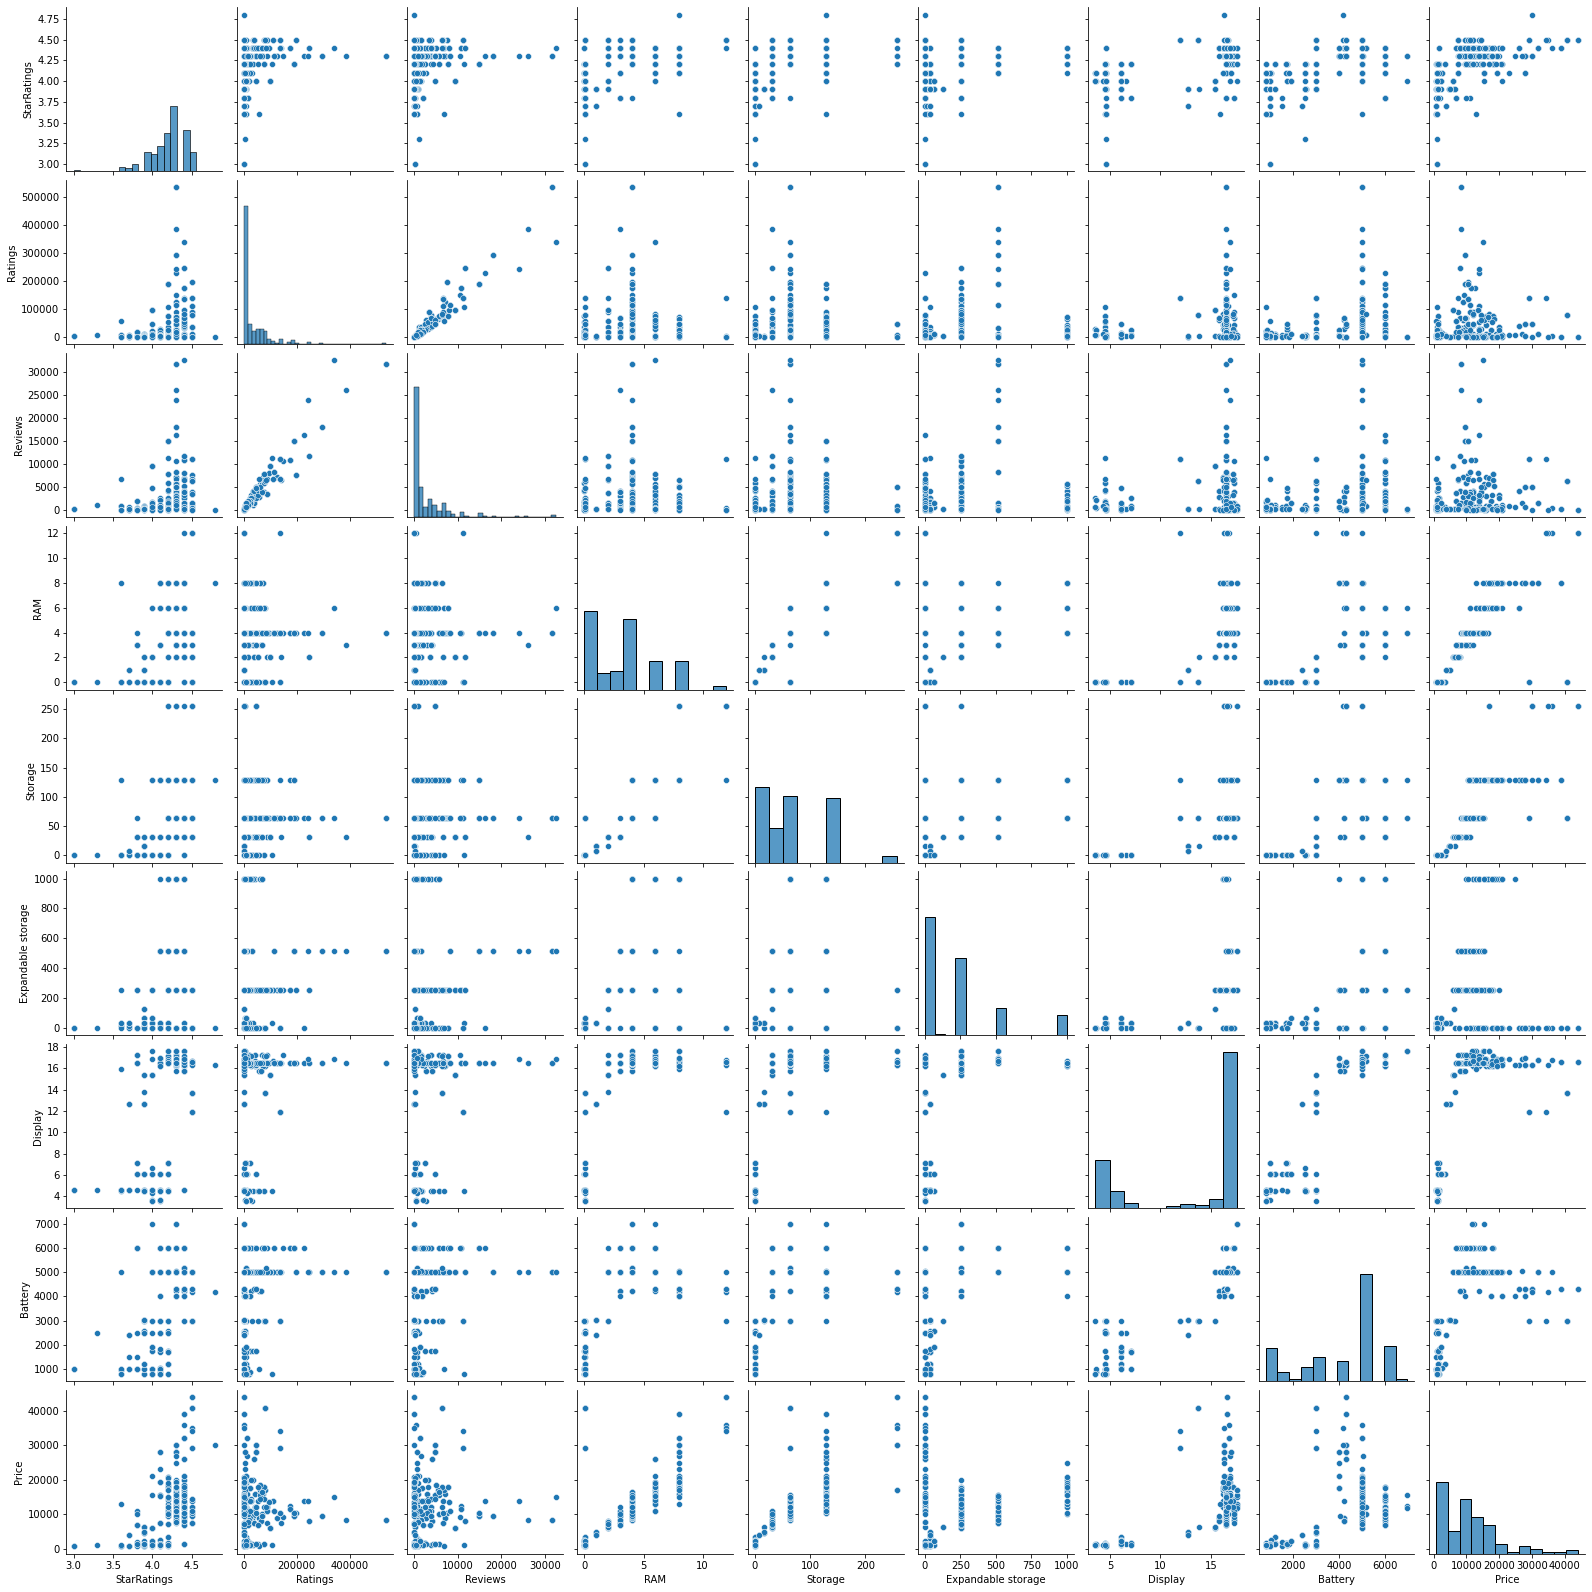

In [58]:
sns.pairplot(Final1.drop('Brand',axis = 1))
plt.show()

## 2 heatmap

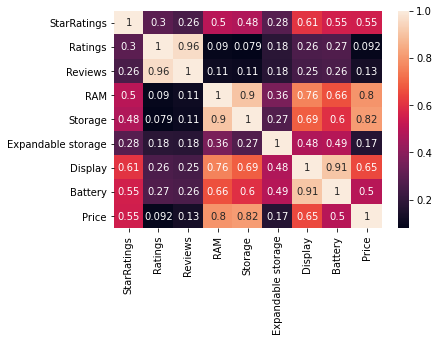

In [59]:
sns.heatmap(Final1.corr(), annot=True)
plt.show()